In [55]:
import numpy as np
import rasterio as rio
from glob import glob

path = "E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1/"


sentinel_bands = glob(f"{path}*B?*.tif")
print(sentinel_bands)
sentinel_bands.sort()

img = rio.open(f"{path}20220614_174810_06_2442_3B_AnalyticMS.tif")

print(img.name,img.closed,img.count, img.width, img.height, img.block_shapes[0], img.block_windows(1))
print(img.block_window(1,0,0).)
{i: dtype for i, dtype in zip(img.indexes, img.dtypes)}
print("shows the world covered in meters: ",img.bounds)
print("the spatial location of upper left corner: ", img.transform*(0,0))
print("the spatial location of lower right corner: ", img.transform * (img.width, img.height))
print("the reference from where the spatial location is coming: ", img.crs, "which identifies a particular coordinate reference system: UTM zone 12N. This system is used for mapping areas in the Northern Hemisphere between 108 and 114 degrees west.")

['E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1\\20220614_174810_06_2442_3B_AnalyticMS.tif']
E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1/20220614_174810_06_2442_3B_AnalyticMS.tif False 4 13035 9178 (256, 256) <generator object at 0x000002669809EF20>


AttributeError: 'Window' object has no attribute 'describe'

In [35]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

path = "E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1/"

S_sentinel_bands = glob(f"{path}*B?*.tif")

S_sentinel_bands.sort()

print(S_sentinel_bands)

l = []

for i in S_sentinel_bands:
    print(i)
    with rio.open(i, 'r') as f:
        l.append(f.read(1))
        l.append(f.read(2))
        l.append(f.read(3))

arr_st = np.stack(l)
print(arr_st.shape)

['E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1\\20220614_174810_06_2442_3B_AnalyticMS.tif']
E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1\20220614_174810_06_2442_3B_AnalyticMS.tif
(3, 9178, 13035)


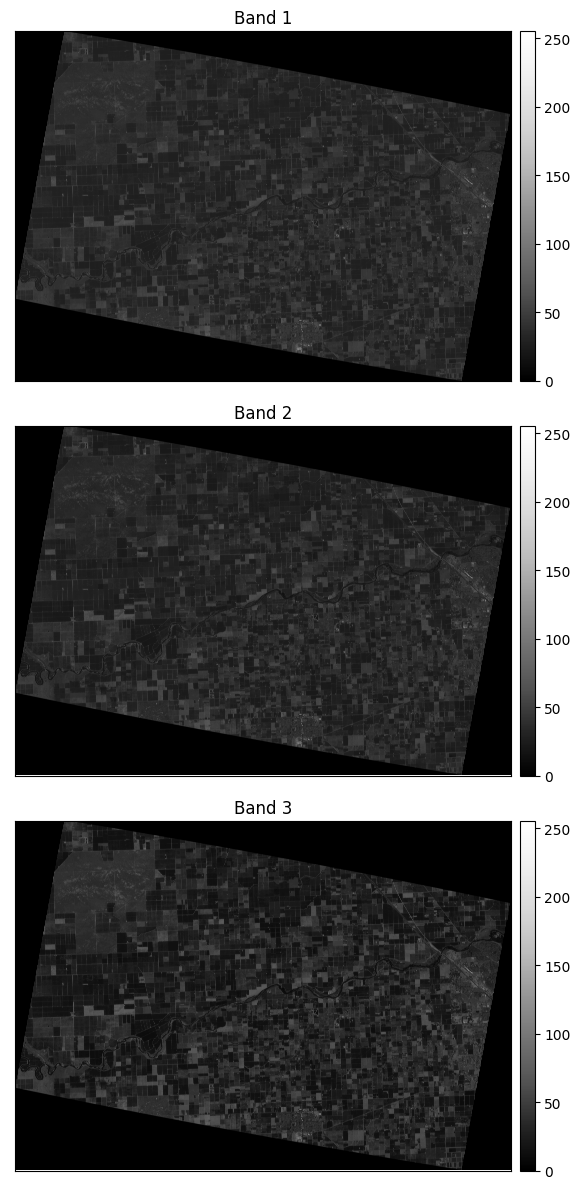

In [29]:
ep.plot_bands(arr_st, cols=1, scale=True)
plt.show()

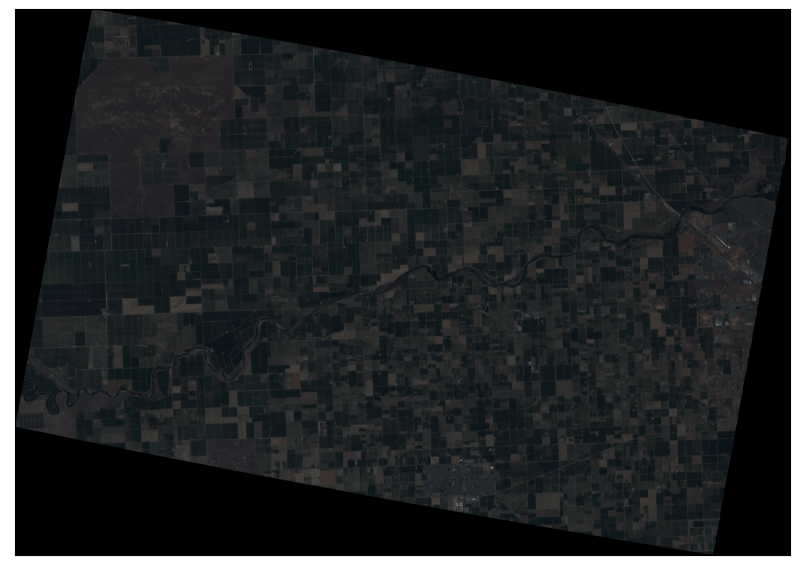

In [33]:
# rgb = ep.plot_rgb(arr_st, rgb=(2,1,0), scale=True)
# plt.show()

In [60]:
# Load the satellite image
img = rasterio.open('E:/ACPS_PROJECT_DATASET/SENTINEL_2/images1/20220614_174810_06_2442_3B_AnalyticMS.tif')
data = np.transpose(img.read(), [1, 2, 0])

# Extract the RGB channels 
r = data[:, :, 0]
g = data[:, :, 1]
b = data[:, :, 2]

# Flatten the channels into a single array
X = np.reshape(data, [-1, 3])

if X.size % 3 != 0:
    raise ValueError('Size of X is not divisible by 3')

# Perform K-means clustering with k=5 (5 clusters)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Extract the cluster labels and reshape to the original image shape
labels = kmeans.labels_.reshape([data.shape[0], data.shape[1]])

# Plot the original image and the segmented image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data)
axs[0].set_title('Original Image')
axs[1].imshow(labels)
axs[1].set_title('Segmented Image')

plt.show()


MemoryError: Unable to allocate 3.57 GiB for an array with shape (159513640, 3) and data type float64

In [2]:
!pip install plotly

     ---------------------------------------- 15.3/15.3 MB 5.0 MB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\harsh\acpsenv\Scripts\python.exe -m pip install --upgrade pip' command.
